# <font color="bordo">Programming Exercise 1 - Logistic Regression</font>
<p>
In the first part of the exercise, you will build a logistic regression model to
predict whether a student gets admitted into a university.
<p>
Suppose that you are the administrator of a university department and
you want to determine each applicant’s chance of admission 
<br>based on their results on two exams. 
<p>
You have historical data from previous applicants
that you can use as a training set for logistic regression. 
<br>
For each training example, you have the applicant’s scores on two exams and the admissions decision.
<br>
Your task is to build a classification model that estimates an applicant’s
probability of admission based the scores from those two exams.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


In [2]:
def loaddata(file, delimeter):
    data = np.loadtxt(file, delimiter=delimeter)
    print('Dimensions: ',data.shape)
    print(data[0:6,:]) # print data samples
    return(data)

In [3]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

### Load data
<a id='loading_data'></a>

In [4]:
data = loaddata('data/ex2data1.txt', ',')

('Dimensions: ', (100, 3))
[[ 34.62365962  78.02469282   0.        ]
 [ 30.28671077  43.89499752   0.        ]
 [ 35.84740877  72.90219803   0.        ]
 [ 60.18259939  86.3085521    1.        ]
 [ 79.03273605  75.34437644   1.        ]
 [ 45.08327748  56.31637178   0.        ]]


In [5]:
X = np.c_[np.ones((data.shape[0],1)), data[:,0:2]]
y = np.c_[data[:,2]]

# np.c_ Translates slice objects to concatenation along the second axis.
# Example: np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
# >>> array([[1, 2, 3, 0, 0, 4, 5, 6]])

### Plotting the data
<a id='plotting_data'></a>
<p>
Before starting to implement any learning algorithm, it is always good to
visualize the data if possible.

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


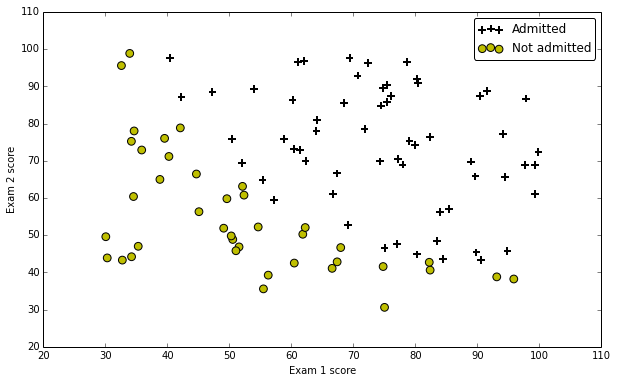

In [6]:
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')

### Logistic Regression Hypothesis
<a id='hypothesis'></a>
<p>
Logistic Regression hypothesis is defined as:
<p>
<font size="4em">$h_{\theta}(x) = g(\theta^{T}x)$</font>
<p>
where function g is the sigmoid function. The sigmoid function is defined as:
<p>
<font size="4em">$g(z)=\frac{1}{1+e^{−z}}$</font>

In [7]:
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))

### Cost Function
<a id='cost_function'></a>
<p>
Recall that the cost function in logistic regression is:
<p>
<font size="3em">$J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big]$</font>
<p>
Vectorized Cost Function
<p>
<font size="3em">$J(\theta) = \frac{1}{m}\big((\,log\,(g(X\theta))^Ty+(\,log\,(1-g(X\theta))^T(1-y)\big)$</font>

In [8]:
def costFunction(theta, X, y):
    m = float(y.size)
    h = sigmoid(X.dot(theta))
    
    J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
               
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

### Gradient Descent
<a id='gradient_descent'></a>

<p>
The gradient of the cost is a vector of the same length as $θ$ where the $j^{th}$
element (for $j = 0, 1, . . . , n$) is defined as follows:

<p>
<font size="4em">
$\frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j}$
</font>

<p>
Vectorized

<p>
<font size="4em">
$\frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m} X^T(g(X\theta)-y)$
</font>

<p>
Note that while this gradient looks identical to the linear regression gradient, 
<br>the formula is actually different because linear and logistic regression
have different definitions of $h_θ(x)$.

In [9]:
def gradient(theta, X, y):
    
    h = sigmoid(X.dot(theta.reshape(-1,1)))
    
    m = float(y.size)
    grad =(1/m)*X.T.dot(h-y)
    
    return(grad.flatten())

### Initial theta and cost

In [10]:
initial_theta = np.zeros(X.shape[1])
cost = costFunction(initial_theta, X, y)
grad = gradient(initial_theta, X, y)
print('Cost: \n', cost)
print('Grad: \n', grad)

('Cost: \n', 0.69314718055994495)
('Grad: \n', array([ -0.1       , -12.00921659, -11.26284221]))


### Optimizing the cost function
<a id='optimize_cost'></a>

In [11]:
res = minimize(costFunction, 
               initial_theta, 
               args=(X,y), 
               method='Newton-CG', 
               jac=gradient, 
               options={'maxiter':400})

theta = res.x

# Print theta to screen
print('Cost at theta found by minimize: ', res.fun)
print('theta: ', theta)

('Cost at theta found by minimize: ', 0.20349782013753298)
('theta: ', array([-25.13311256,   0.20600601,   0.20124322]))


### Prediction
<a id='prediction'></a>

In [12]:
def predict(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta.T)) >= threshold
    return(p.astype('int'))

In [13]:
p = predict(theta, X) 
print('Train accuracy {}%'.format(100*sum(p == y.ravel())/p.size))

Train accuracy 89%


For a student with an Exam 1 score of 45 and an Exam 2 score of 85, 
<br>you should expect to see an admission probability of 0.776 and prediction of 1 (admitted).

In [14]:
x1 = np.array([1, 45, 85])
print('admission probability: ', sigmoid(x1.T.dot(theta)))
print('prediction: ', predict(theta, x1))

('admission probability: ', 0.77605647646409381)
('prediction: ', 1)


### Decision Boundary
<a id='decision_boundary'></a>

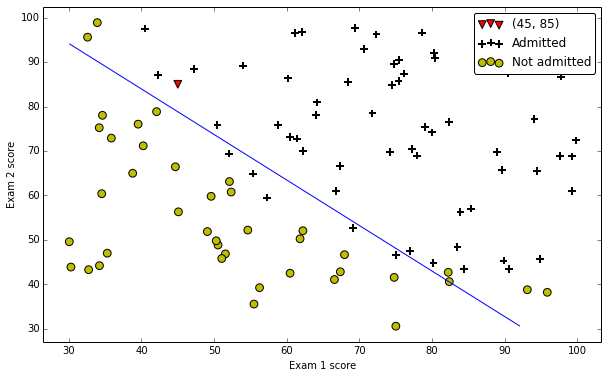

In [16]:
plt.scatter(45, 85, s=60, c='r', marker='v', label='(45, 85)')
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')
x1_min, x1_max = X[:,1].min(), X[:,1].max(),
x2_min, x2_max = X[:,2].min(), X[:,2].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(res.x))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b');